## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [15]:
!pip install py-openaq

In [42]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Let's load the dataset

In [17]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [18]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
8842,2021-10-06 22:00:00,FR04004,o3,35.8,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-06 20:00:00+00:00,48.891670,2.346669
11850,2021-10-05 01:00:00,London Eltham,no2,-0.3,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-05 00:00:00+00:00,51.452580,0.070766
28597,2021-09-29 18:15:00,"NSIT Dwarka, Delhi - CPCB",co,390.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:45:00+00:00,28.609090,77.032541
36450,2021-09-28 21:30:00,"Okhla Phase-2, Delhi - DPCC",co,1500.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:00:00+00:00,28.530785,77.271255
34634,2021-09-29 02:15:00,"Okhla Phase-2, Delhi - DPCC",pm25,36.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 20:45:00+00:00,28.530785,77.271255


In [19]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [20]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [21]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [22]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [23]:
o3levels=airQualityCities[airQualityCities['parameter']=='o3']
o3levels

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
13,2021-10-12 18:00:00,London Harlington,o3,34.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
14,2021-10-12 18:00:00,Thurrock,o3,25.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.477070,0.317969
15,2021-10-12 18:00:00,London Haringey Priory Park South,o3,35.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.584128,-0.125254
19,2021-10-12 18:00:00,Southend-on-Sea,o3,34.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
20,2021-10-12 18:00:00,London Eltham,o3,24.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
...,...,...,...,...,...,...,...,...,...,...
37069,2021-09-28 20:15:00,"Rohini, Delhi - DPCC",o3,6.10,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.732528,77.119920
37074,2021-09-28 20:15:00,"NSIT Dwarka, Delhi - CPCB",o3,27.92,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.609090,77.032541
37076,2021-09-28 20:15:00,"Lodhi Road, Delhi - IITM",o3,17.16,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.588333,77.221667
37080,2021-09-28 20:15:00,"Dwarka-Sector 8, Delhi - DPCC",o3,1.10,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.571027,77.071901


In [24]:
o3levels[(o3levels['value']>120)]

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523
36164,2021-09-28 22:15:00,"Ashok Vihar, Delhi - DPCC",o3,205.50,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:45:00+00:00,28.695381,77.181665
36327,2021-09-28 22:00:00,"North Campus, DU, Delhi - IMD",o3,121.33,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 16:30:00+00:00,28.657381,77.158545


In [58]:
## Delhi and Madrid are the most polluted cities

## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

[(0.0, 100.0)]

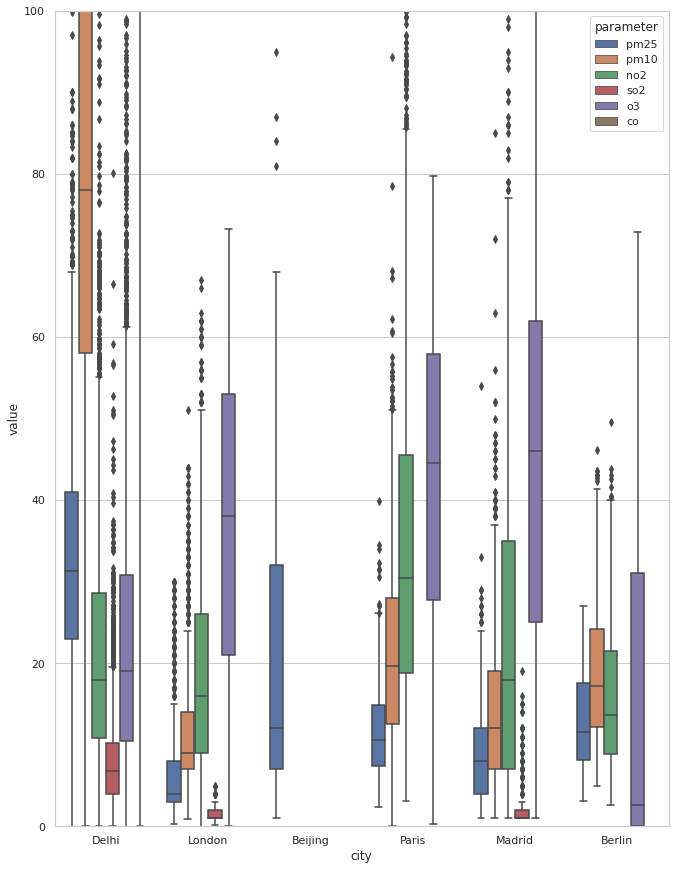

In [69]:

cleancity = sns.boxplot(x='city',y='value',hue = 'parameter',fliersize=5,data =airQualityCities)
cleancity.set(ylim=(0, 100))

In [4]:
## Berlin is the cleanest

## Question 3. Which location is the most poluted in London ?

In [28]:
London=airQualityCities[(airQualityCities['city']=='London')]
London

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
...,...,...,...,...,...,...,...,...,...,...
36973,2021-09-28 16:00:00,London Haringey Priory Park South,no2,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254
36979,2021-09-28 16:00:00,London Haringey Priory Park South,o3,57.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254
36982,2021-09-28 16:00:00,London Eltham,pm10,7.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.452580,0.070766
36984,2021-09-28 16:00:00,Thurrock,no2,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.477070,0.317969


In [29]:
London['location'].unique()

array(['Southend-on-Sea', 'London Eltham', 'Tower Hamlets Roadside',
       'London Harlington', 'Thurrock',
       'London Haringey Priory Park South'], dtype=object)

In [56]:
London.groupby('location').mean().sort_values(by='value', ascending= False)

,value,coordinates.latitude,coordinates.longitude
location,,,
London Haringey Priory Park South,29.631161,51.584128,-0.125254
Tower Hamlets Roadside,24.288514,51.522530,-0.042155
Southend-on-Sea,18.670849,51.544206,0.678408
London Harlington,18.375527,51.488790,-0.441614
Thurrock,17.024240,51.477070,0.317969
London Eltham,16.832881,51.452580,0.070766


In [57]:
## London Haringey Priory Park South is the most polluted

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

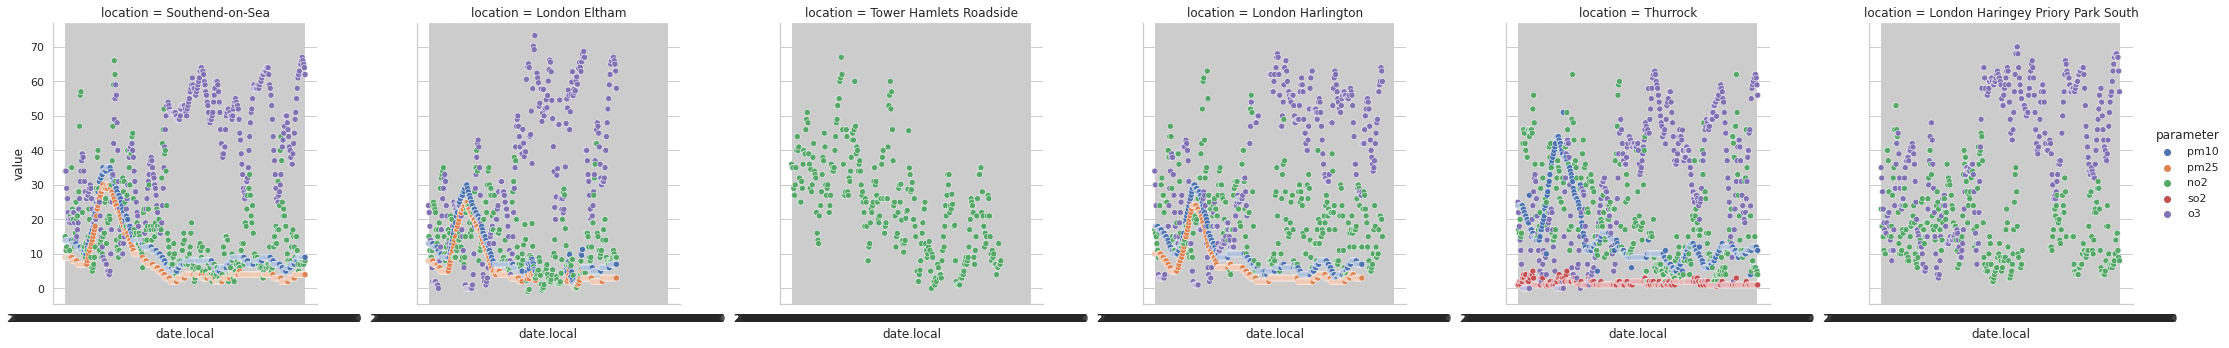

In [53]:
sns.relplot(x='date.local',y='value',col='location',data=London,hue='parameter')

## South end on sea and London Eltham have higher levels of o3
## Tower Hamlets Roadside is affected by no2
## London Harlington and Thurrock have higher levels of o3 and are affcted by higher levels of no2 insome parts of the day
## London Haringey Priory Park South is affected by o3 and no2,out of which o3 is higher when compared to no2

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [33]:
### response: they are strongly correlated

In [34]:
LondonPM25=London[London['parameter']=='pm25']
LondonPM25.sort_values(by='value',ascending= False)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
3129,2021-10-10 06:00:00,Southend-on-Sea,pm25,30.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 05:00:00+00:00,51.544206,0.678408
2747,2021-10-10 13:00:00,Southend-on-Sea,pm25,30.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 12:00:00+00:00,51.544206,0.678408
2933,2021-10-10 08:00:00,Southend-on-Sea,pm25,30.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 07:00:00+00:00,51.544206,0.678408
3175,2021-10-10 05:00:00,Southend-on-Sea,pm25,30.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 04:00:00+00:00,51.544206,0.678408
3205,2021-10-10 04:00:00,Southend-on-Sea,pm25,30.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 03:00:00+00:00,51.544206,0.678408
...,...,...,...,...,...,...,...,...,...,...
17485,2021-10-01 07:00:00,London Eltham,pm25,0.9,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 06:00:00+00:00,51.452580,0.070766
17891,2021-10-01 02:00:00,London Eltham,pm25,0.8,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 01:00:00+00:00,51.452580,0.070766
17652,2021-10-01 04:00:00,London Eltham,pm25,0.6,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 03:00:00+00:00,51.452580,0.070766
17643,2021-10-01 05:00:00,London Eltham,pm25,0.4,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 04:00:00+00:00,51.452580,0.070766


In [35]:
LondonPM10=London[London['parameter']=='pm10']
LondonPM10.sort_values(by='value',ascending= False)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
3400,2021-10-10 02:00:00,Thurrock,pm10,51.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 01:00:00+00:00,51.47707,0.317969
2856,2021-10-10 10:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 09:00:00+00:00,51.47707,0.317969
2888,2021-10-10 09:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 08:00:00+00:00,51.47707,0.317969
2813,2021-10-10 11:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 10:00:00+00:00,51.47707,0.317969
2784,2021-10-10 12:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 11:00:00+00:00,51.47707,0.317969
...,...,...,...,...,...,...,...,...,...,...
17972,2021-10-01 02:00:00,London Eltham,pm10,1.3,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 01:00:00+00:00,51.45258,0.070766
17654,2021-10-01 04:00:00,London Eltham,pm10,1.2,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 03:00:00+00:00,51.45258,0.070766
17962,2021-10-01 02:00:00,Thurrock,pm10,1.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 01:00:00+00:00,51.47707,0.317969
17605,2021-10-01 06:00:00,London Eltham,pm10,1.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 05:00:00+00:00,51.45258,0.070766


In [36]:
LondonPMvalues=London[(London['parameter']=='pm10')|(London['parameter']=='pm25')]
LondonPMvalues.sort_values(by='value',ascending= False)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
3400,2021-10-10 02:00:00,Thurrock,pm10,51.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 01:00:00+00:00,51.47707,0.317969
2888,2021-10-10 09:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 08:00:00+00:00,51.47707,0.317969
2784,2021-10-10 12:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 11:00:00+00:00,51.47707,0.317969
2813,2021-10-10 11:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 10:00:00+00:00,51.47707,0.317969
2856,2021-10-10 10:00:00,Thurrock,pm10,44.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-10 09:00:00+00:00,51.47707,0.317969
...,...,...,...,...,...,...,...,...,...,...
17485,2021-10-01 07:00:00,London Eltham,pm25,0.9,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 06:00:00+00:00,51.45258,0.070766
17891,2021-10-01 02:00:00,London Eltham,pm25,0.8,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 01:00:00+00:00,51.45258,0.070766
17652,2021-10-01 04:00:00,London Eltham,pm25,0.6,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 03:00:00+00:00,51.45258,0.070766
17643,2021-10-01 05:00:00,London Eltham,pm25,0.4,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-01 04:00:00+00:00,51.45258,0.070766


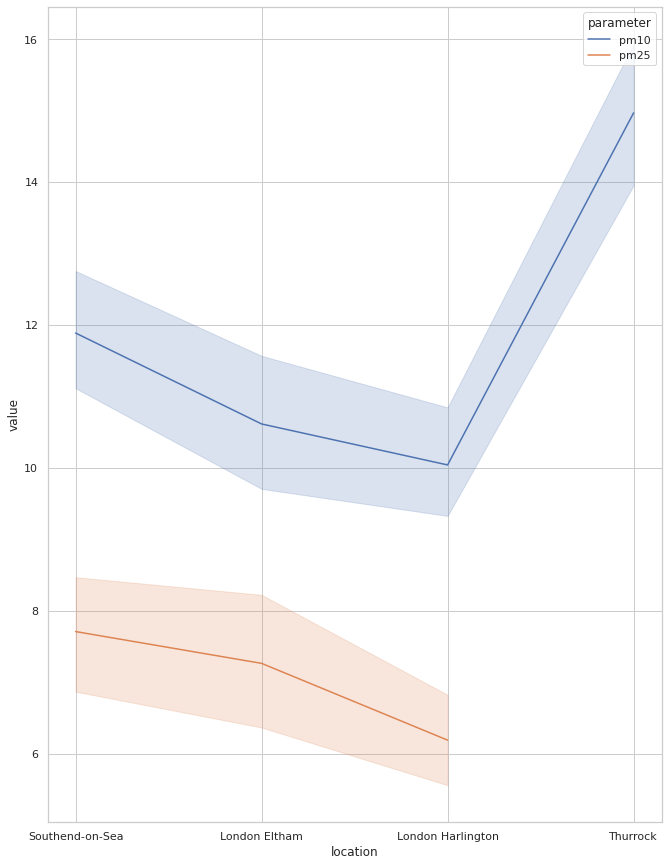

In [37]:
sns.lineplot(x='location',y='value',data=LondonPMvalues,hue='parameter')

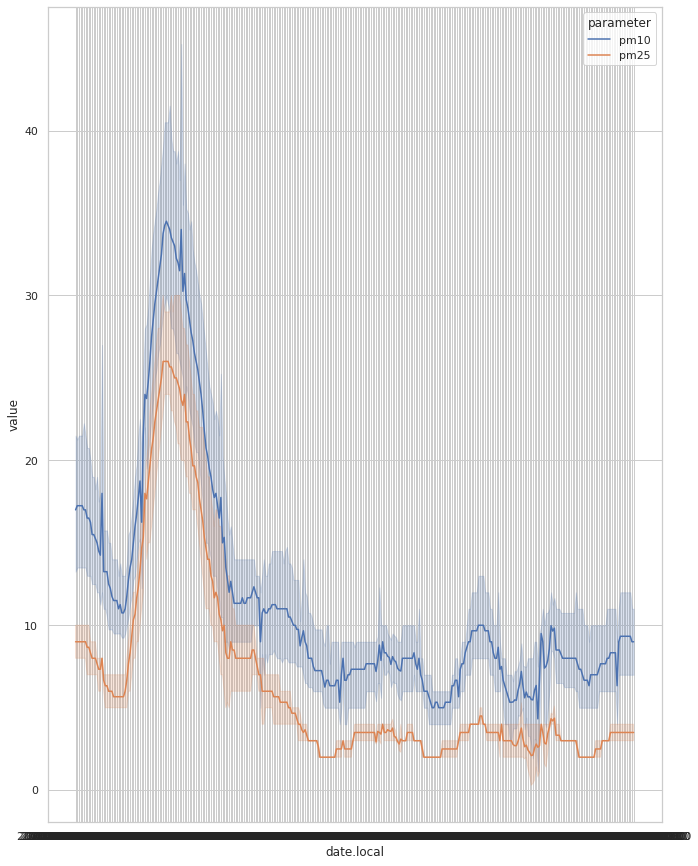

In [38]:
sns.lineplot(x='date.local',y='value',data=LondonPMvalues,hue='parameter')

In [52]:
##  Strongly correlated, when pm10 increases, pm 25 also increases.